In [1]:
import pandas as pd

In [49]:
samples = pd.read_csv('evaluation/reading_ease_comparison_new.csv')
samples

,model,strategy,promt,fre,fkgl,wiener,avg_word_length,avg_sentence_length,words_per_sentence,avg_syllables_per_word,polysyllables,output
0,german_gpt,contrastive,Das,71.00,9.3,5.0,4.78,15.4,15.400000,1.6,10,"Das Wort ""Bären"" ist eine Abkürzung für Bären...."
1,german_gpt,beam,Das,66.90,8.7,7.9,5.54,7.8,7.777778,1.8,19,Das Bundes-Verfassungs-Ministerium ist eine Bu...
2,german_gpt,sampling,Das,65.85,10.2,5.9,5.36,14.7,14.666667,1.7,13,Das Land USA hat ein neues Gesetz verabschiede...
3,german_gpt,contrastive,Heute,74.00,8.1,3.5,4.74,12.4,12.428571,1.6,7,Heute hat ein Mann in einem Hotel eine Frau ge...
4,german_gpt,beam,Heute,79.50,6.0,4.0,5.03,6.9,6.909091,1.6,8,Heute ist eine Stadt in Deutschland.\nSie heiß...
...,...,...,...,...,...,...,...,...,...,...,...,...
175,mGPT_orig,beam,Dieses Haus,62.90,10.3,6.7,5.47,11.8,11.800000,1.8,12,"Dieses Haus liegt in einer ruhigen Wohngegend,..."
176,mGPT_orig,sampling,Dieses Haus,73.75,9.3,4.1,4.46,18.5,18.500000,1.5,7,"Dieses Haus ist ein wunderschön gelegener Ort,..."
177,mGPT_orig,contrastive,Mein Vater,39.10,15.1,8.3,6.28,12.2,12.200000,2.2,15,Mein Vater war in der Zeit des Nationalsoziali...
178,mGPT_orig,beam,Mein Vater,93.55,3.8,0.2,4.25,10.4,10.428571,1.3,4,"Mein Vater hat mir gesagt, dass ich nicht mehr..."


In [50]:
filtered = samples[(samples.promt == 'Dieses Haus') & (samples.strategy == 'contrastive')][['model', 'output']]
#filtered = samples[(samples.strategy == 'contrastive')][['model', 'output']]
filtered

,model,output
12,german_gpt,Dieses Haus in der Stadt New York ist ein berü...
30,german_gpt_orig,Dieses Haus ist ein wunderbares Beispiel für d...
48,wechsel,Dieses Haus in der Stadt New York ist ein groß...
66,wechsel_orig,Dieses Haus befindet sich in einer ruhigen Geg...
84,gerpt2,Dieses Haus ist ein sehr altes Gebäude.\nEs wu...
102,gerpt2_orig,Dieses Haus mit 4 Sternen in Bad Triest\nDas H...
120,oscar,Dieses Haus ist in der Haupt-Stadt New York.\n...
138,oscar_orig,Dieses Haus hat einen sehr hohen Standard. Wir...
156,mGPT,Dieses Haus in der Nähe von Kiel ist für Mensc...
174,mGPT_orig,Dieses Haus ist wirklich schön. Wir haben unse...


In [ ]:
import random
models = ['german_gpt', 'wechsel', 'gerpt2', 'oscar', 'mGPT']
google_form_pairs = {}
for model_name in models:
    orig_first = random.randint(0, 1)
    print(model_name, orig_first == True)
    model_texts = {
        'Text 1': filtered[filtered.model == (model_name + '_orig' if orig_first else model_name)].output.item(),
        'Text 2': filtered[filtered.model == (model_name if orig_first else model_name + '_orig')].output.item(),
        'Text 1 is orig': orig_first == True
    }
    google_form_pairs[model_name] = model_texts
google_form_pairs

In [55]:
import json
with open('evaluation/human_eval_texts.json', 'w+', encoding='utf-8') as f:
    json.dump(google_form_pairs, f)

## Eval responses

In [1]:
import pandas as pd
import json

In [2]:
responses = pd.read_csv('evaluation/Evaluierung von large language models.csv')
responses.rename(columns={'Welcher Text hat weniger Grammatikfehler?': 'Welcher Text hat weniger Grammatikfehler?.0',
    'Welcher Text hat weniger fachliche Fehler?': 'Welcher Text hat weniger fachliche Fehler?.0',
    'Welcher Text ist inhaltlich stimmiger?': 'Welcher Text ist inhaltlich stimmiger?.0'}, inplace=True)
#responses = responses[responses["Ist Deutsch deine Muttersprache?"] == "Ja"]

In [3]:
with open('evaluation/human_eval_texts.json', 'r') as f:
    model_texts = json.load(f)
model_texts

{'german_gpt': {'Text 1': 'Dieses Haus in der Stadt New York ist ein berühmtes Museum.\nEs zeigt Menschen aus aller Welt, die im 19 Jahrhundert gelebt haben: Die Geschichte von den USA geht bis ins Jahr 1776 zurück und erzählt vom Land Amerika vor mehr als 100 Jahren auf einer Reise durch Europa mit einem Schiff nach Hause oder an Bord des Schiffes "Titan". Das Wort Titan bedeutet so viel wie „Eis-Schiff“. In dem Buch heißt es auch über das Eis fahrender Mensch kann man lesen, dass er eine Insel besucht hat;',
  'Text 2': 'Dieses Haus ist ein wunderbares Beispiel für die Architektur der Renaissance.\nEs wurde im 15./16 Jahrhundert erbaut und hat eine schöne Fassade mit einem großen Fenster, das von einer Balustrade umrahmt wird; es gibt auch einen kleinen Garten in dem sich Blumenbeete befinden (eingezäunt).Das Gebäude befindet suggestiv über den Straßen des Viertels San Martino di Castrozza gelegen: Es besteht aus zwei Teilen – eines auf jeder Seite sowie drei Seiten angrenzend - wo m

In [4]:
criterion_dict = {
    'Welcher Text hat weniger Grammatikfehler?': 'grammar',
    'Welcher Text hat weniger fachliche Fehler?': 'factuality',
    'Welcher Text ist inhaltlich stimmiger?': 'coherence',
}
responses.filter(like='.2')

,Welcher Text hat weniger Grammatikfehler?.2,Welcher Text hat weniger fachliche Fehler?.2,Welcher Text ist inhaltlich stimmiger?.2
0,Text 1,Text 1,Beide sind gleich gut
1,Text 1,Beide sind gleich gut,Text 1
2,Text 1,Beide sind gleich gut,Text 2
3,Text 1,Text 2,Beide sind gleich gut
4,Beide sind gleich gut,Beide sind gleich gut,Text 1
5,Text 2,Text 2,Text 2
6,Text 1,Text 2,Beide sind gleich gut
7,Beide sind gleich gut,Beide sind gleich gut,Beide sind gleich gut


In [5]:
model_eval = {}
for i, model_name in enumerate(model_texts.keys()):
    i = str(i)
    model_responses = responses.filter(like='.'+i).copy()
    answers_to_numeric = {
        'Beide sind gleich gut': 0,
        'Text 1': -1 if model_texts[model_name]['Text 1 is orig'] else 1,
        'Text 2': 1 if model_texts[model_name]['Text 1 is orig'] else -1,
    }
    model_responses.replace(answers_to_numeric, inplace=True)
    model_eval[model_name] = []
    for question in criterion_dict.keys():
        model_eval[model_name].append(model_responses[question+'.'+i].values)
#model_eval

([<matplotlib.axis.YTick at 0x205a24c05e0>,
 [Text(0, -1, 'Orig better'), Text(0, 0, 'equal'), Text(0, 1, 'FT better')])

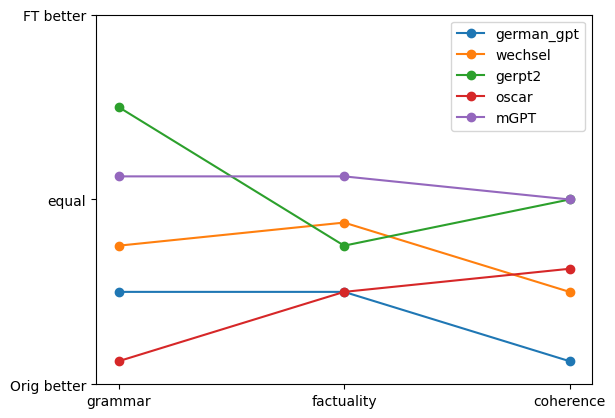

In [6]:
# all answers
import matplotlib.pyplot as plt
import numpy as np

plt.xticks([0,1,2], labels=['grammar', 'factuality', 'coherence'])
#for m, v in d.items():
for model_name, eval in model_eval.items():
    plt.plot(np.mean(eval, axis=1), 'o-', label=model_name)
plt.legend()
plt.yticks([-1,0,1], labels=['Orig better', 'equal', 'FT better'])

(array([[5., 0., 2., 0., 1.],
       [3., 0., 4., 0., 1.],
       [1., 0., 2., 0., 5.],
       [7., 0., 1., 0., 0.],
       [3., 0., 1., 0., 4.]]), array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ]), <a list of 5 BarContainer objects>)


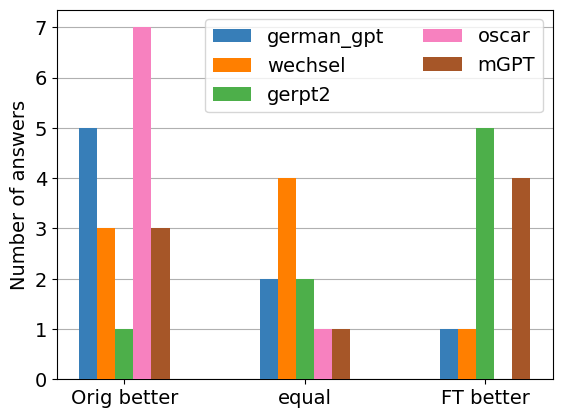

In [63]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
plt.grid(zorder=0, axis='y')
scores = []
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628']#, '#984ea3', '#999999', '#e41a1c', '#dede00']
for model_name, eval in model_eval.items():
    #plt.hist(model_eval[model_name][0], align='mid', alpha=0.5, histtype='bar', label=model_name)
    scores.append(model_eval[model_name][0])
print(plt.hist(scores, label=list(model_eval.keys()), rwidth=3, align='mid', color=CB_color_cycle, bins=5, range=(-1,1), zorder=3))
plt.legend(ncol=2)
plt.xticks([-0.8,0,0.8], labels=['Orig better', 'equal', 'FT better'])
#plt.yticks([0,2,4,6], labels=[0,2,4,6])
plt.ylabel("Number of answers")
plt.savefig("evaluation/grammaticality_human.pdf")

([<matplotlib.axis.YTick at 0x19f32a76a30>,
 [Text(0, -1, 'Orig better'), Text(0, 0, 'equal'), Text(0, 1, 'FT better')])

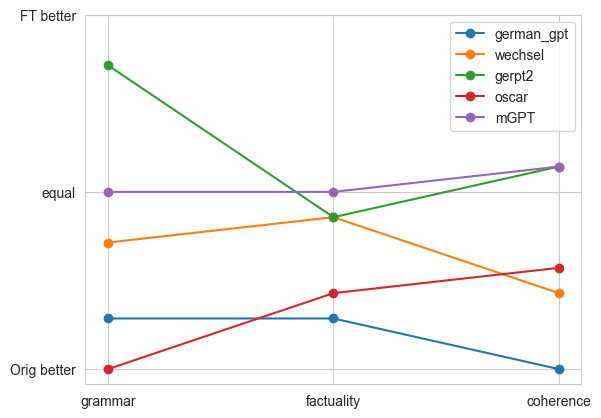

In [10]:
# only native speakers
import matplotlib.pyplot as plt

d = {
    'a': [-1, 1, 0],
    'b': [1, 0, -1]
}
plt.xticks([0,1,2], labels=['grammar', 'factuality', 'coherence'])
#for m, v in d.items():
for model_name, eval in model_eval.items():
    plt.plot(eval, 'o-', label=model_name)
plt.legend()
plt.yticks([-1,0,1], labels=['Orig better', 'equal', 'FT better'])

In [12]:
model_eval

{'german_gpt': [-0.7142857142857143, -0.7142857142857143, -1.0],
 'wechsel': [-0.2857142857142857, -0.14285714285714285, -0.5714285714285714],
 'gerpt2': [0.7142857142857143, -0.14285714285714285, 0.14285714285714285],
 'oscar': [-1.0, -0.5714285714285714, -0.42857142857142855],
 'mGPT': [0.0, 0.0, 0.14285714285714285]}